# Final Exam

## Question 5

#### 5.1 Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

#### 5.2 Load the dataset into a DataFrame object

In [2]:
df = pd.read_csv('data/players_stats.csv')
df.head()

,name,photo_url,positions,age,birth_date,height,weight,football_club,national_team,overall_rating,...,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,DefensiveAwareness,StandingTackle,SlidingTackle
0,Lionel Andrés Messi Cuccittini,https://cdn.sofifa.com/players/158/023/20_120.png,"RW,ST,CF",32,1987/Jun/24,170,72,FC Barcelona,Argentina,94,...,68,94,48,40,94,94,75,33,37,26
1,Cristiano Ronaldo dos Santos Aveir,https://cdn.sofifa.com/players/020/801/20_120.png,"ST,LW",34,1985/Feb/5,187,83,Juventus,Portugal,93,...,78,93,63,29,95,82,85,28,32,24
2,Neymar da Silva Santos Júnior,https://cdn.sofifa.com/players/190/871/20_120.png,"LW,CAM",27,1992/Feb/5,175,68,Paris Saint-Germain,Brazil,92,...,49,85,51,36,87,90,92,35,30,29
3,Virgil van Dijk,https://cdn.sofifa.com/players/203/376/20_120.png,CB,27,1991/Jul/8,193,92,Liverpool,Netherlands,91,...,92,64,83,90,47,65,62,93,93,86
4,Jan Oblak,https://cdn.sofifa.com/players/200/389/20_120.png,GK,26,1993/Jan/7,188,87,Atlético Madrid,Slovenia,91,...,78,12,34,19,11,65,11,27,12,18


In [3]:
df.columns

Index(['name', 'photo_url', 'positions', 'age', 'birth_date', 'height',
       'weight', 'football_club', 'national_team', 'overall_rating',
       'potential', 'value', 'wages', 'best_position', 'best_rating',
       'Preferred Foot', 'Weak Foot', 'Skill Moves',
       'International Reputation', 'Work Rate', 'Body Type', 'Real Face',
       'Release Clause', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'DefensiveAwareness', 'StandingTackle', 'SlidingTackle'],
      dtype='object')

#### 5.3 Visualize the data, use only two of these attributes at the time

In [4]:
selectedAttr = df.sample(250)[['overall_rating', 'potential']]
selectedAttr

,overall_rating,potential
11500,65,65
18977,53,63
19370,51,60
19581,49,69
7590,68,68
...,...,...
11706,65,81
9949,66,68
8860,67,76
6594,69,69


#### 5.4 Normalise the attributes

In [5]:
scaler = StandardScaler().fit(selectedAttr)
data = scaler.transform(selectedAttr)
data

array([[-0.19546059, -0.98490243],
       [-1.95109463, -1.30159131],
       [-2.24370031, -1.77662464],
       [-2.53630598, -0.35152466],
       [ 0.24344792, -0.5098691 ],
       [ 0.24344792, -0.19318022],
       [-0.78067194, -1.6182802 ],
       [-0.78067194, -0.35152466],
       [ 0.09714508, -0.19318022],
       [ 0.53605359, -0.19318022],
       [ 0.38975076,  0.91523087],
       [ 1.12126494,  1.3902642 ],
       [-1.36588329, -0.03483578],
       [-1.95109463, -2.88503573],
       [-1.21958045,  0.12350866],
       [ 1.12126494,  1.54860864],
       [ 0.53605359, -0.19318022],
       [-0.48806626,  0.12350866],
       [-1.21958045,  0.28185311],
       [ 0.24344792, -0.5098691 ],
       [-0.48806626, -0.19318022],
       [ 1.56017345,  0.91523087],
       [ 0.38975076,  0.91523087],
       [-1.36588329, -0.98490243],
       [-0.6343691 , -1.45993576],
       [ 0.24344792, -0.5098691 ],
       [ 1.56017345,  0.91523087],
       [ 0.09714508,  1.70695309],
       [ 0.97496211,

#### 5.5  Show correlation

In [6]:
selectedAttr.corr(method = 'pearson')

,overall_rating,potential
overall_rating,1.000000,0.663993
potential,0.663993,1.000000


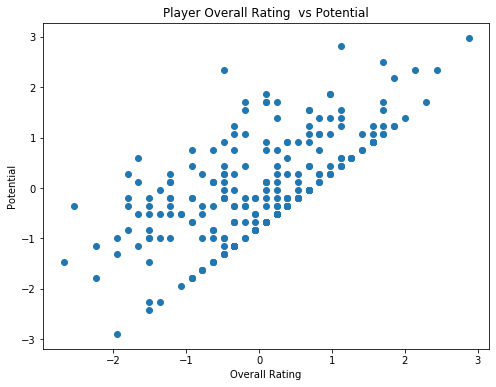

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1])
plt.xlabel("Overall Rating")
plt.ylabel("Potential")
plt.title("Player Overall Rating  vs Potential");

#### 5.6 Construct a density-based clustering model and extract cluster labels and outliers to plot your results

In [8]:
db = DBSCAN(eps=0.3, min_samples=5).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [9]:
n_clusters_ = np.unique(labels)
n_clusters_

array([-1,  0,  1,  2,  3], dtype=int64)

In [10]:
colors = plt.cm.Spectral(np.linspace(0,1, len(n_clusters_)))
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.97485582, 0.557401  , 0.32272203, 1.        ],
       [0.99807766, 0.99923106, 0.74602076, 1.        ],
       [0.52733564, 0.8106113 , 0.64521338, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

#### 5.6.1 Density-based spatial clustering of applications with noise (DBSCAN)

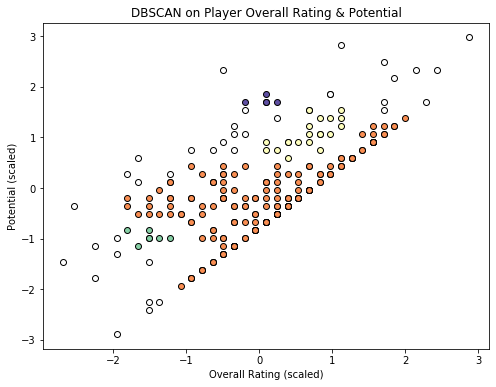

In [11]:
plt.figure(figsize=(8, 6))
for (label, color) in zip(n_clusters_, colors):
    if label == -1: 
        # White used for noise. 
        color = 'white'
        
    class_member_mask = (labels == label)
    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = color, 
                                   markersize = 6,                 
                                   markeredgecolor='k')
    
    xy2 = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = color, 
                                     markersize = 6,                
                                     markeredgecolor='k')
    
plt.title("DBSCAN on Player Overall Rating & Potential")
plt.xlabel("Overall Rating (scaled)")
plt.ylabel("Potential (scaled)");

#### 5.6.2 K-means Clustering

In [12]:
kmeans = KMeans(n_clusters = 3).fit(data)
labels_kmeans = kmeans.labels_
centroids = kmeans.cluster_centers_

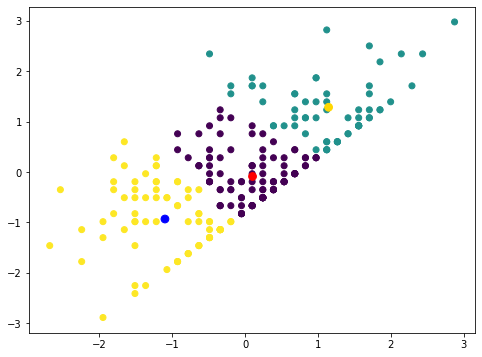

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1], c = labels_kmeans)
plt.scatter(centroids[:,0], centroids[:,1], c = ['red',"gold", "blue"], s = 60 );

## References
- [DBSCAN Clustering in ML | Density based clustering](https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/)
- [Clustering Code Implementation](https://app.dominodatalab.com/u/LeJit/Clustering/view/Clustering.ipynb)
- [Understanding Density-based Clustering](https://www.kdnuggets.com/2020/02/understanding-density-based-clustering.html)
- [K-Means vs. DBSCAN Clustering — For Beginners](https://towardsdatascience.com/k-means-vs-dbscan-clustering-49f8e627de27)
- [KMeans vs. DBScan](https://medium.com/@soroushhashemifar/kmeans-vs-dbscan-d9d5f9dbee8b#:~:text=Density%20clustering%20algorithms%20use%20the,to%20find%2C%20which%20KMeans%20needs.&text=DBSCAN%20produces%20a%20varying%20number,based%20on%20the%20input%20data.)